In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the plot theme for Seaborn
sns.set_theme(style="whitegrid")

In [3]:
# Load the dataset
file_name = 'Coffe_sales.csv'
df = pd.read_csv(file_name)

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print("Data Loaded and Preprocessed.")

Data Loaded and Preprocessed.


Part 1: Univariate Analysis

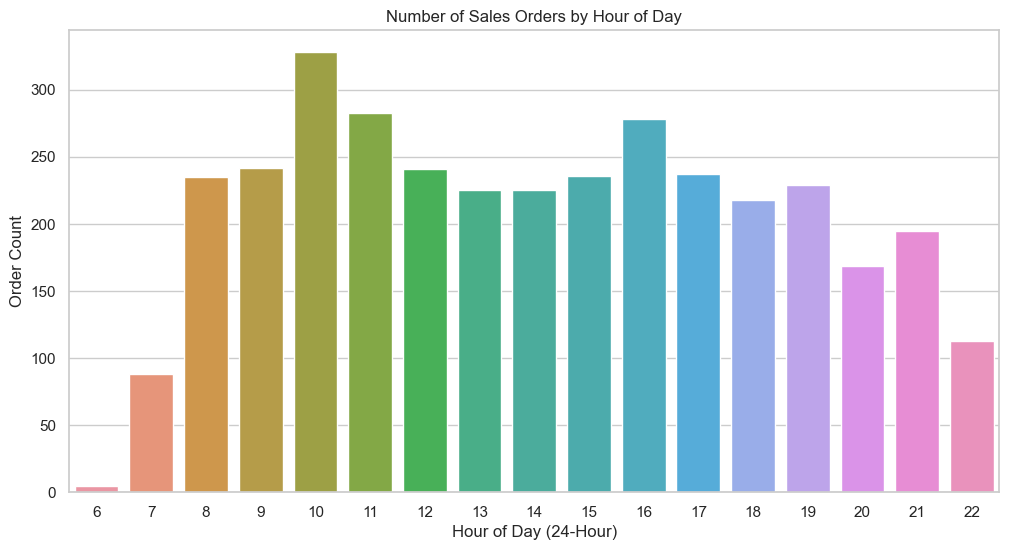

In [4]:
# Sales by Hour of Day

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour_of_day')
plt.title('Number of Sales Orders by Hour of Day')
plt.xlabel('Hour of Day (24-Hour)')
plt.ylabel('Order Count')
plt.show()

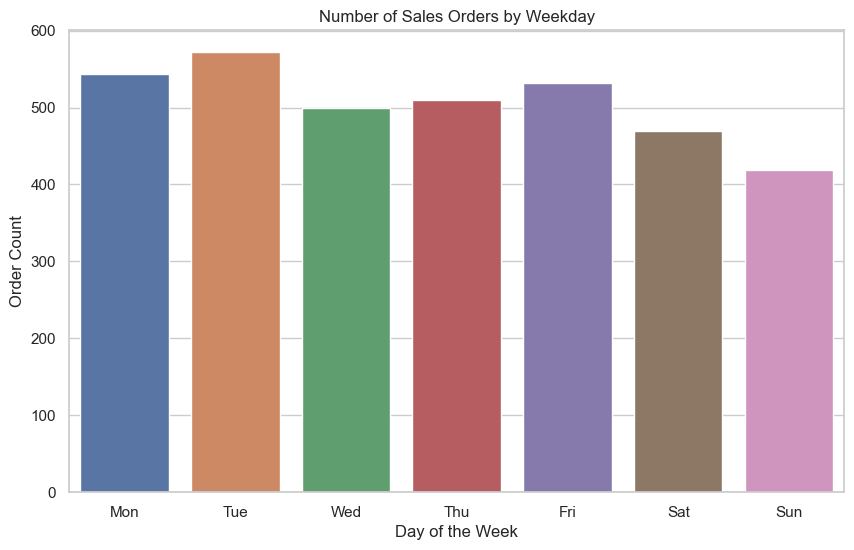

In [5]:
# Sales by Weekday
# Use Weekdaysort to ensure correct order
weekday_order_en = df.sort_values('Weekdaysort')['Weekday'].unique()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weekday', order=weekday_order_en)
plt.title('Number of Sales Orders by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.show()

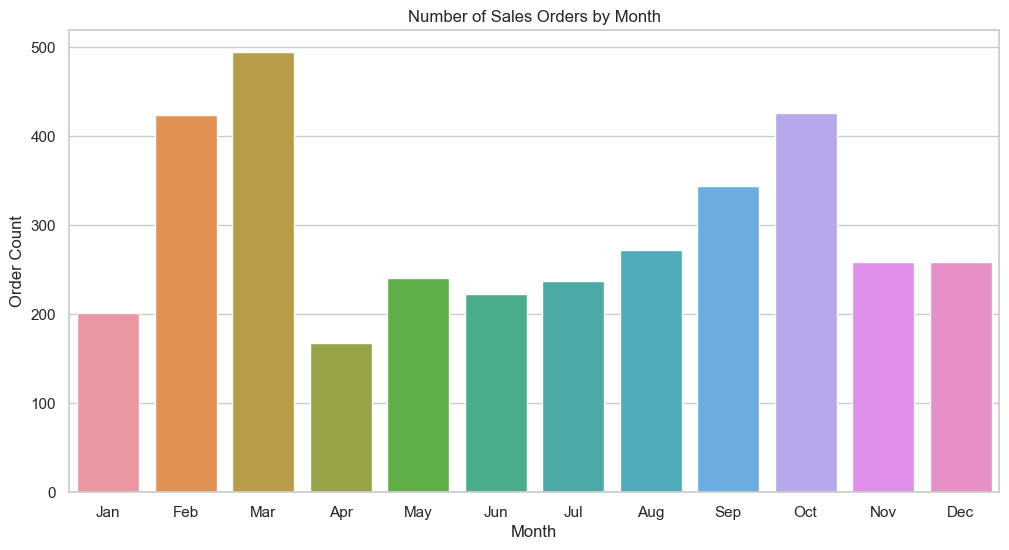

In [6]:
# Sales by Month
# Use Monthsort to ensure correct order
month_order_en = df.sort_values('Monthsort')['Month_name'].unique()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Month_name', order=month_order_en)
plt.title('Number of Sales Orders by Month')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.show()

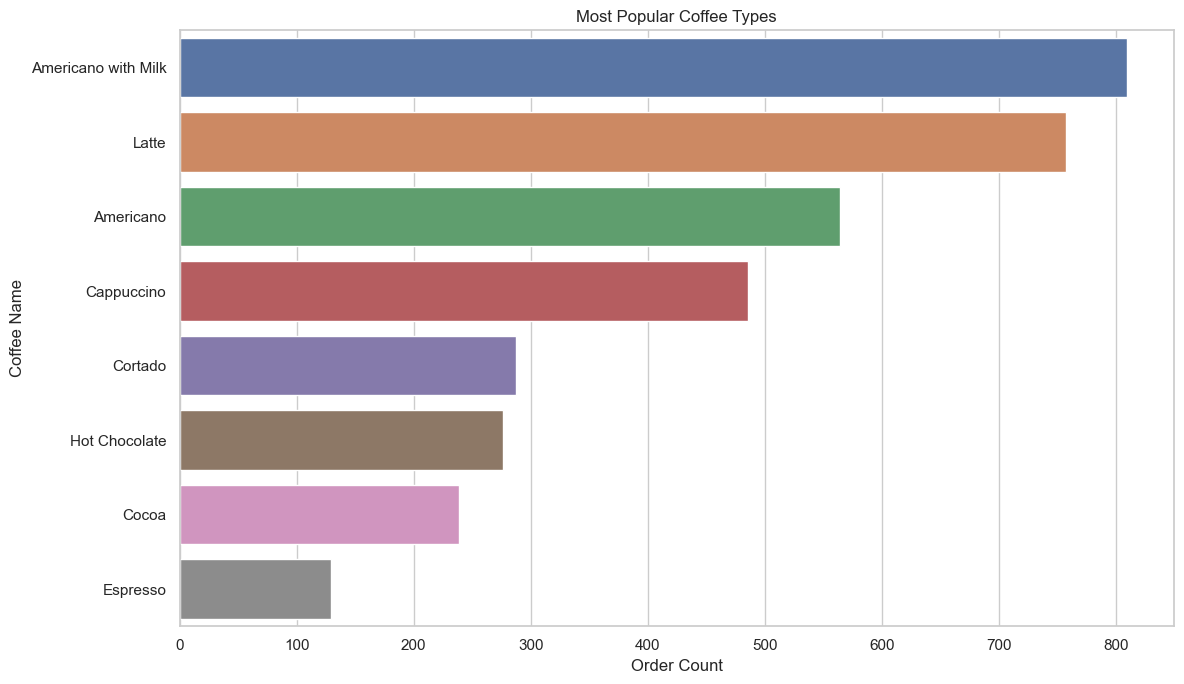

In [7]:
# Most Popular Coffee Types
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title('Most Popular Coffee Types')
plt.xlabel('Order Count')
plt.ylabel('Coffee Name')
plt.tight_layout()
plt.show()

d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


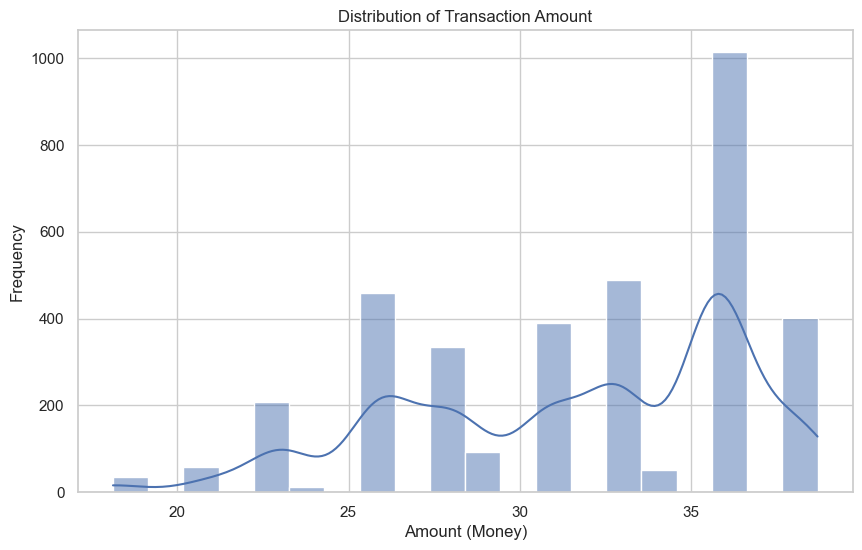

In [8]:
# Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['money'], kde=True, bins=20)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount (Money)')
plt.ylabel('Frequency')
plt.show()

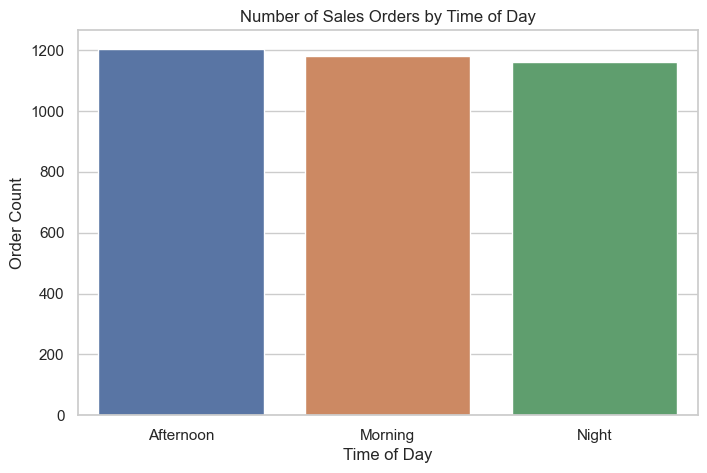

In [9]:
# Sales by Time of Day (Segment)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time_of_Day', order=df['Time_of_Day'].value_counts().index)
plt.title('Number of Sales Orders by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Order Count')
plt.show()

Part 2: Bivariate & Time Series Analysis

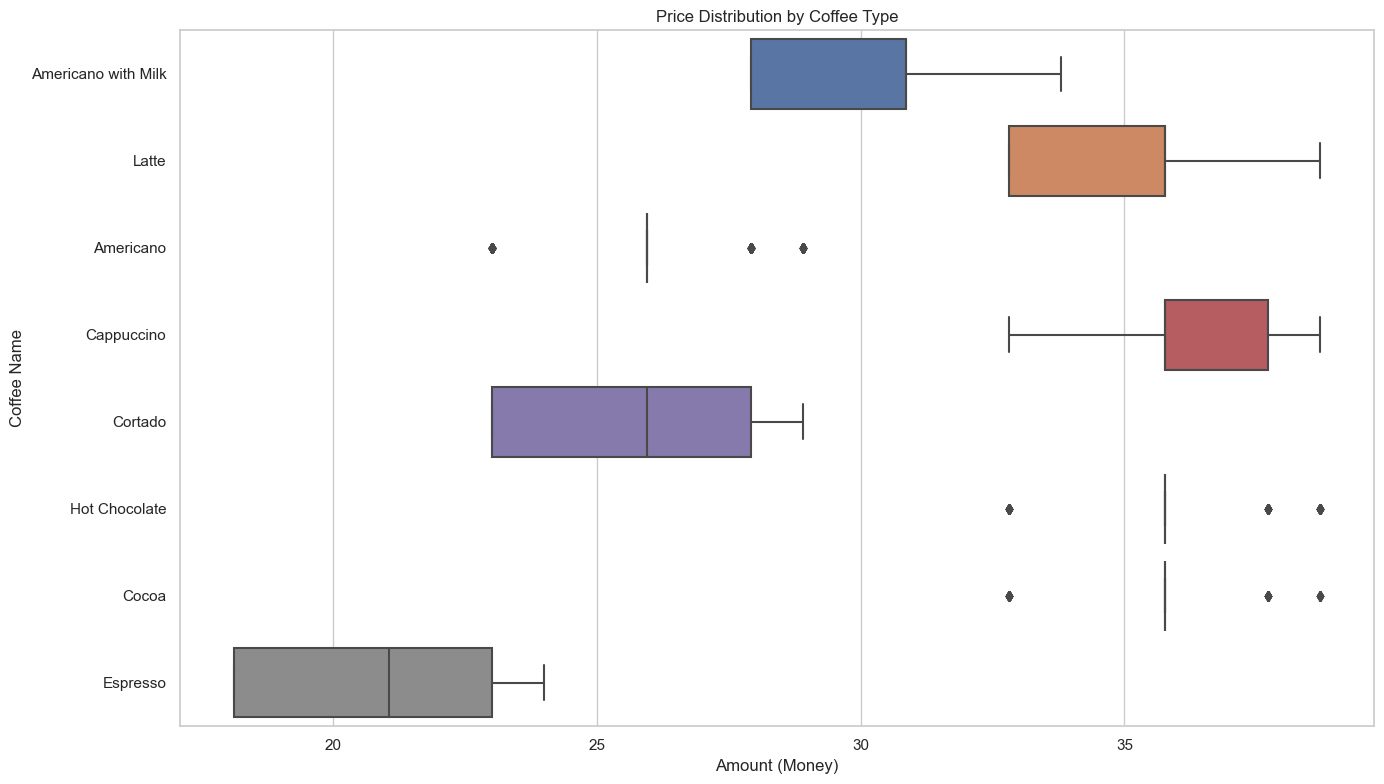

In [10]:
# Price Distribution by Coffee Type
plt.figure(figsize=(14, 8))
y_order_coffee = df['coffee_name'].value_counts().index
sns.boxplot(data=df, x='money', y='coffee_name', order=y_order_coffee)
plt.title('Price Distribution by Coffee Type')
plt.xlabel('Amount (Money)')
plt.ylabel('Coffee Name')
plt.tight_layout()
plt.show()

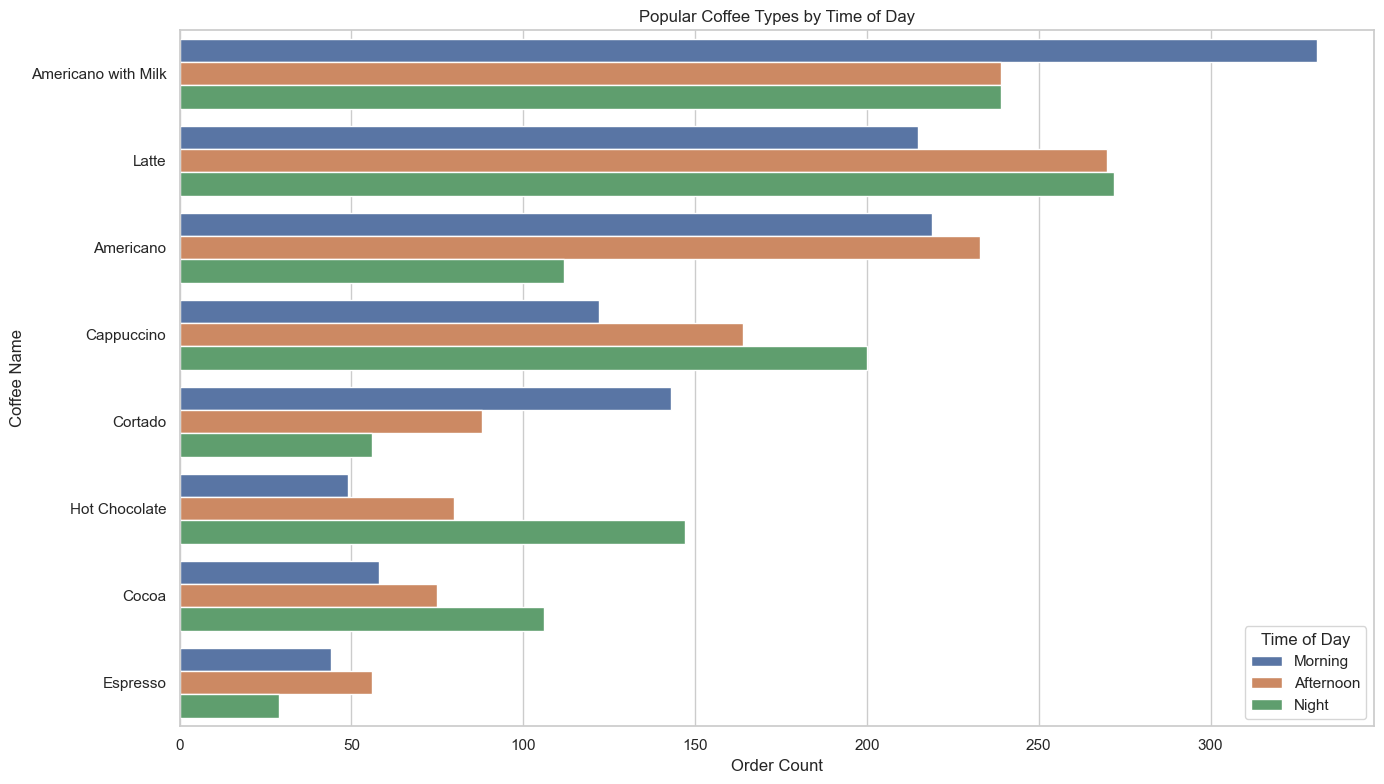

In [11]:
# Popular Coffee Types by Time of Day
plt.figure(figsize=(14, 8))
y_order_coffee = df['coffee_name'].value_counts().index
sns.countplot(data=df, y='coffee_name', hue='Time_of_Day', order=y_order_coffee)
plt.title('Popular Coffee Types by Time of Day')
plt.xlabel('Order Count')
plt.ylabel('Coffee Name')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


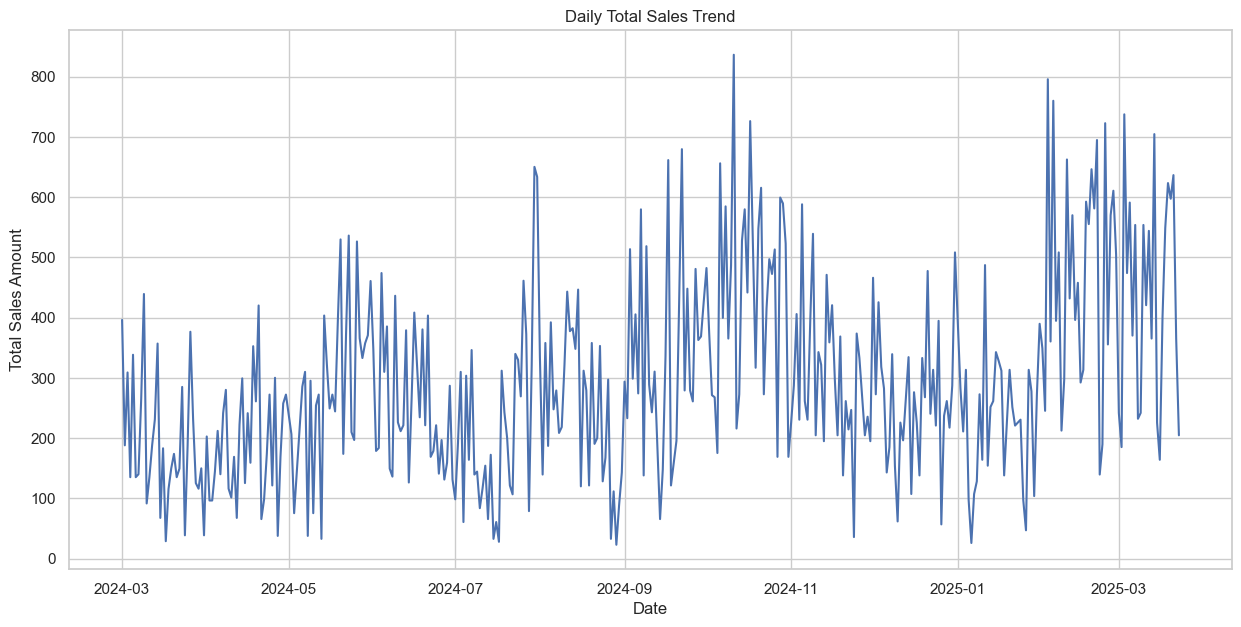

In [12]:
# Daily Total Sales Trend
daily_sales_en = df.groupby('Date')['money'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=daily_sales_en, x='Date', y='money')
plt.title('Daily Total Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()

Part 3: Deeper Analysis

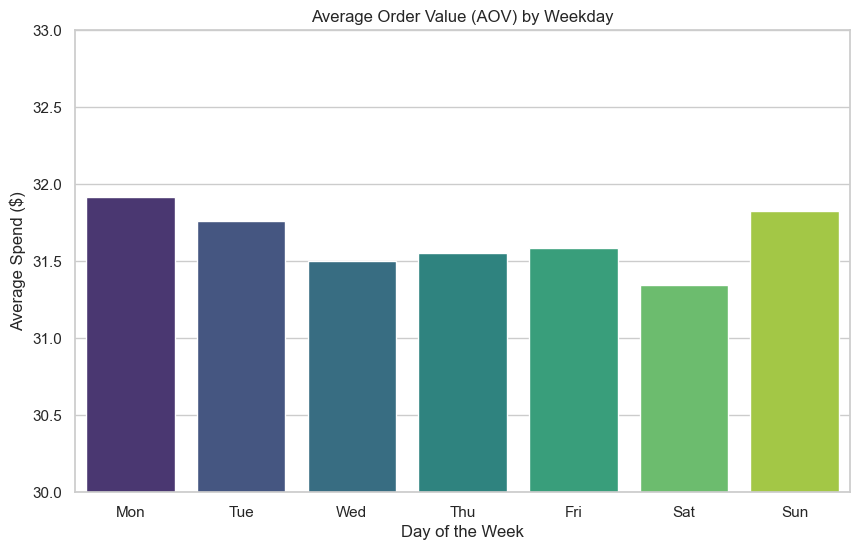

In [13]:
# Average Order Value (AOV) by Weekday
aov_weekday_en = df.groupby(['Weekday', 'Weekdaysort'])['money'].mean().reset_index().sort_values('Weekdaysort')

plt.figure(figsize=(10, 6))
sns.barplot(data=aov_weekday_en, x='Weekday', y='money', palette='viridis')
plt.title('Average Order Value (AOV) by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Spend ($)')
plt.ylim(30, 33) # Set Y-axis limit to emphasize variations
plt.show()

d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


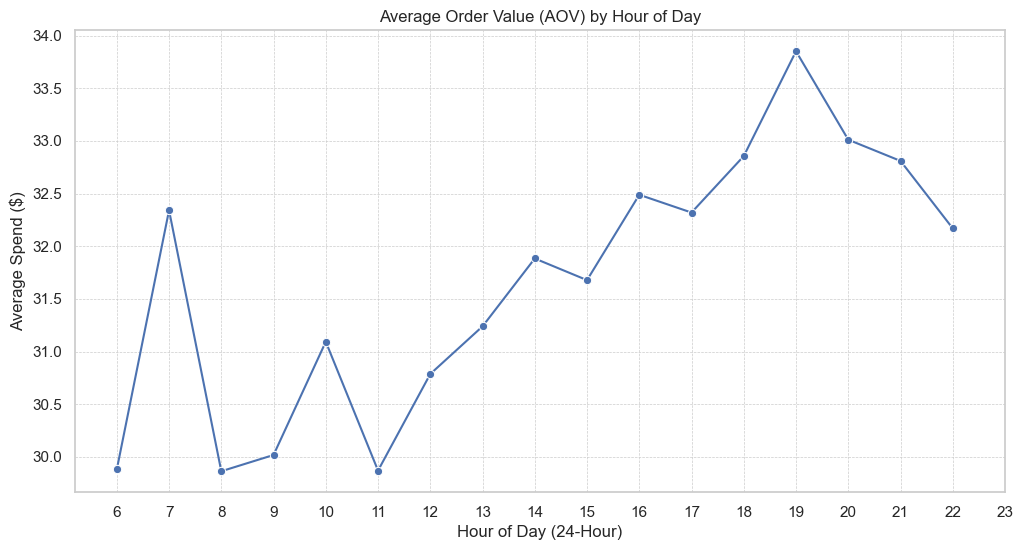

In [14]:
# Average Order Value (AOV) by Hour
aov_hour_en = df.groupby('hour_of_day')['money'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=aov_hour_en, x='hour_of_day', y='money', marker='o')
plt.title('Average Order Value (AOV) by Hour of Day')
plt.xlabel('Hour of Day (24-Hour)')
plt.ylabel('Average Spend ($)')
plt.xticks(np.arange(6, 24, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

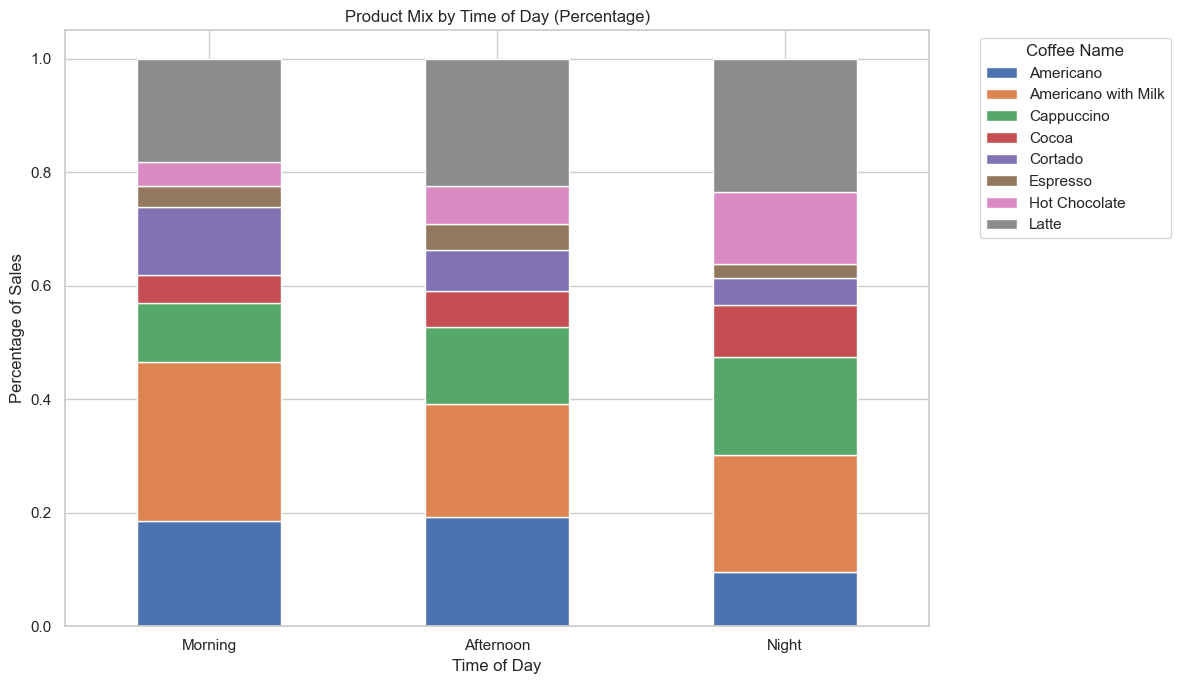

In [15]:
# Product Mix by Time of Day (100% Stacked Bar)
crosstab_mix_en = pd.crosstab(df['Time_of_Day'], df['coffee_name'])

# Normalize by row (index) to get percentages
crosstab_mix_pct_en = crosstab_mix_en.div(crosstab_mix_en.sum(axis=1), axis=0)

# Re-order the index for a logical flow
order_mix_en = ['Morning', 'Afternoon', 'Night']
crosstab_mix_pct_en = crosstab_mix_pct_en.reindex(order_mix_en)

# Plot the 100% stacked bar chart
ax = crosstab_mix_pct_en.plot(kind='bar', stacked=True, figsize=(12, 7),
                               title='Product Mix by Time of Day (Percentage)')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Sales')
plt.xticks(rotation=0)
plt.legend(title='Coffee Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

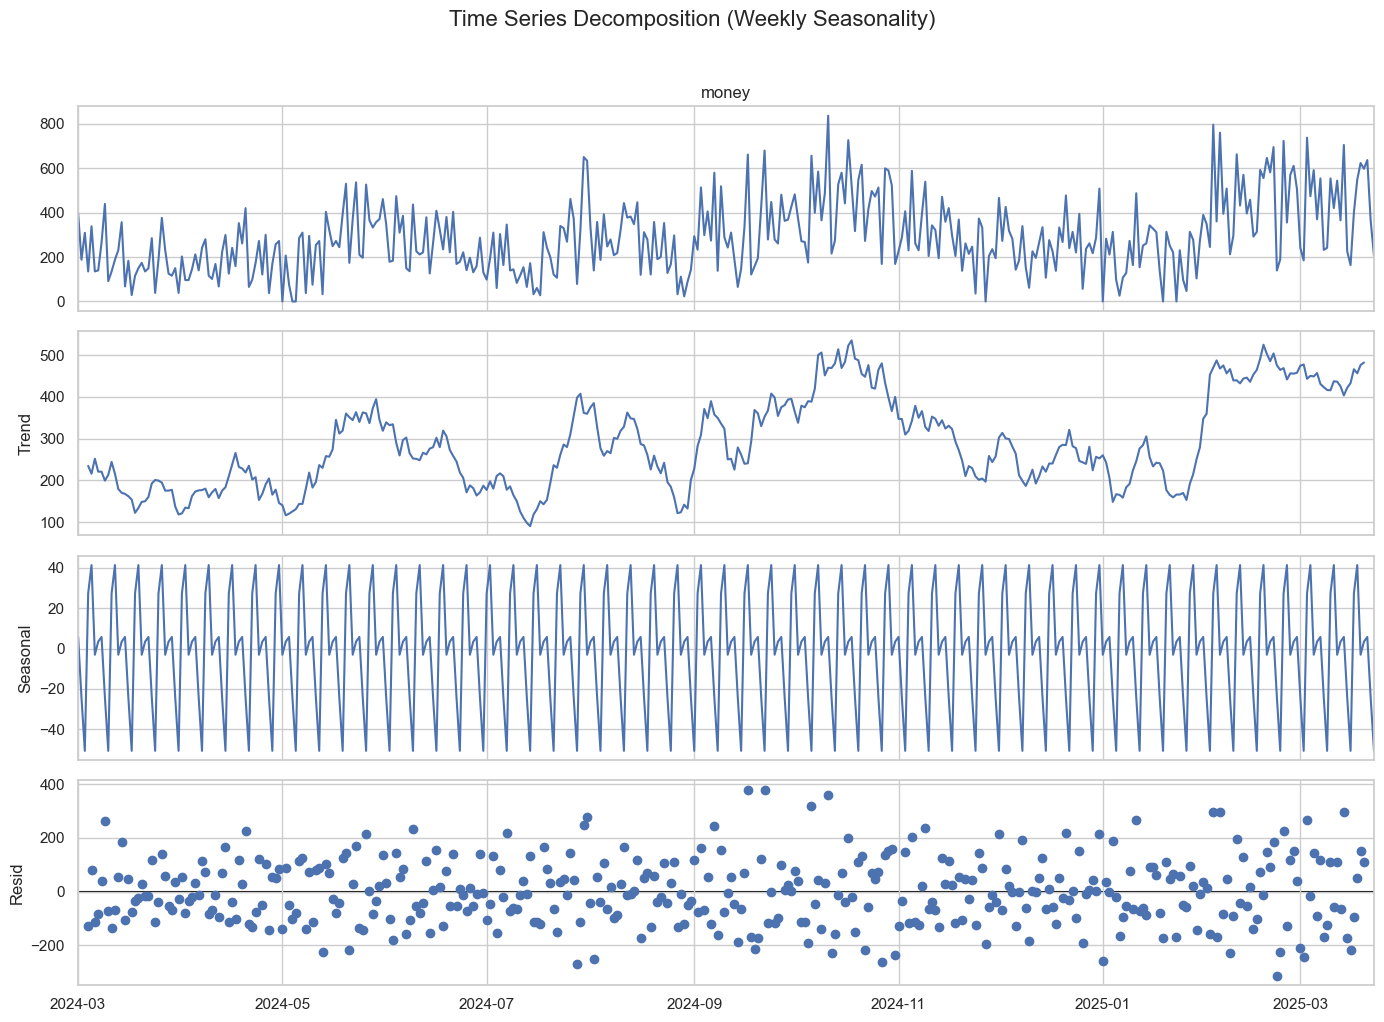

In [16]:
# Time Series Decomposition
# Aggregate data to daily, filling missing days with 0
daily_sales_ts_en = df.groupby('Date')['money'].sum().asfreq('D', fill_value=0)

# Decompose the time series (period=7 for weekly seasonality)
decomposition_en = seasonal_decompose(daily_sales_ts_en, model='additive', period=7)

# Plot the components
fig = decomposition_en.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Time Series Decomposition (Weekly Seasonality)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()